In [ ]:
def summation_unit(inputs, weights):


    if len(inputs) != len(weights):
        raise ValueError("Inputs and weights must have the same length.")
    return sum(i * w for i, w in zip(inputs, weights))


In [ ]:
def step_function(x):

    #Step activation function.



    return 1 if x >= 0 else 0


In [ ]:
def bipolar_step_function(x):

    return 1 if x >= 0 else -1


In [ ]:
import numpy as np

def sigmoid(x):

    return 1 / (1 + np.exp(-x))


In [ ]:
def tanh(x):
    """
    Hyperbolic tangent activation function.


    """
    return np.tanh(x)


In [ ]:
def relu(x):
    """
    Rectified Linear Unit (ReLU) activation function.



    """
    return np.maximum(0, x)


In [ ]:
def leaky_relu(x, alpha=0.01):
    """
    Leaky Rectified Linear Unit (Leaky ReLU) activation function.


    """
    return np.where(x > 0, x, alpha * x)


In [ ]:
def mean_squared_error(y_true, y_pred):
    """
    Compute the Mean Squared Error (MSE) between true and predicted values.


    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean((y_true - y_pred) ** 2)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    """
    Step activation function.

    Parameters:
    x (float or np.array): Input value(s).

    Returns:
    int or np.array: Output after applying the step function.
    """
    return 1 if x >= 0 else 0

def initialize_weights(W0, W1, W2):
    """
    Initialize weights for the perceptron.

    Parameters:
    W0 (float): Initial bias weight.
    W1 (float): Initial weight for the first feature.
    W2 (float): Initial weight for the second feature.

    Returns:
    tuple: Initial weights (W0, W1, W2).
    """
    return W0, W1, W2

def update_weights(W0, W1, W2, x0, x1, error, learning_rate):
    """
    Update weights based on the error.

    Parameters:
    W0, W1, W2 (float): Current weights.
    x0, x1 (float): Feature values.
    error (float): Error from the prediction.
    learning_rate (float): Learning rate.

    Returns:
    tuple: Updated weights (W0, W1, W2).
    """
    W0 += learning_rate * error
    W1 += learning_rate * error * x0
    W2 += learning_rate * error * x1
    return W0, W1, W2

def perceptron_learning(X, y, W0, W1, W2, learning_rate, epochs):
    """
    Train the perceptron using the provided data.

    Parameters:
    X (np.array): Feature data.
    y (np.array): Target labels.
    W0, W1, W2 (float): Initial weights.
    learning_rate (float): Learning rate.
    epochs (int): Number of epochs.

    Returns:
    tuple: Final weights (W0, W1, W2) and list of error values for each epoch.
    """
    error_list = []

    for epoch in range(epochs):
        total_error = 0
        for i in range(len(X)):
            x0, x1 = X[i]
            target = y[i]

            # Calculate the weighted sum
            weighted_sum = W0 + W1 * x0 + W2 * x1

            # Apply the activation function
            output = step_function(weighted_sum)

            # Calculate the error
            error = target - output
            total_error += error**2

            # Update weights
            W0, W1, W2 = update_weights(W0, W1, W2, x0, x1, error, learning_rate)

        # Store the error value
        error_list.append(total_error)

    return W0, W1, W2, error_list

def plot_error_vs_epochs(error_list):
    """
    Plot the error values against epochs.

    Parameters:
    error_list (list): List of error values for each epoch.
    """
    plt.plot(range(len(error_list)), error_list, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Sum-Square Error')
    plt.title('Epochs vs Error Values')
    plt.grid(True)
    plt.show()



Final Weights: W0 = 0.8499999999999925, W1 = -0.75, W2 = -0.7999999999999998


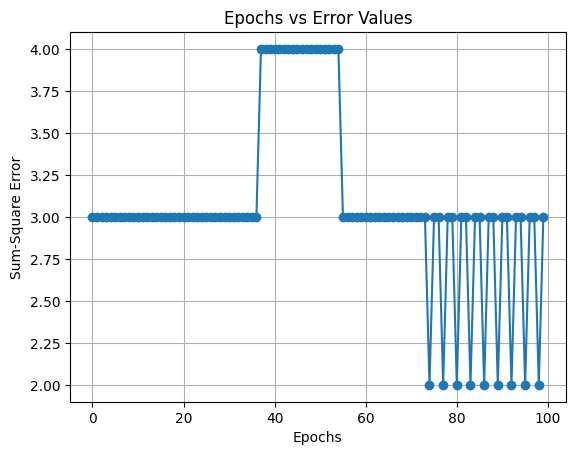

In [2]:
# Main program
if __name__ == "__main__":
    # Initialize parameters
    initial_W0 = 10
    initial_W1 = 0.2
    initial_W2 = -0.75
    learning_rate = 0.05
    epochs = 100

    # AND gate data
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([0, 0, 0, 1])  # AND gate outputs

    # Initialize weights
    W0, W1, W2 = initialize_weights(initial_W0, initial_W1, initial_W2)

    # Train the perceptron
    final_W0, final_W1, final_W2, error_list = perceptron_learning(X, y, W0, W1, W2, learning_rate, epochs)

    # Print final weights
    print(f"Final Weights: W0 = {final_W0}, W1 = {final_W1}, W2 = {final_W2}")

    # Plotting Epochs vs Error Values
    plot_error_vs_epochs(error_list)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# a) Summation Unit
def summation_unit(weights, inputs):
    """
    Summation unit that computes the weighted sum of inputs.

    Parameters:
    weights (np.array): Weights array.
    inputs (np.array): Inputs array (including bias).

    Returns:
    float: Weighted sum.
    """
    return np.dot(weights, inputs)

# b) Activation Unit – Step, Bipolar Step, Sigmoid, TanH, ReLU, Leaky ReLU
def step_activation(x):
    """ Step activation function. """
    return 1 if x >= 0 else 0

def bipolar_step_activation(x):
    """ Bipolar step activation function. """
    return 1 if x >= 0 else -1

def sigmoid_activation(x):
    """ Sigmoid activation function. """
    return 1 / (1 + np.exp(-x))

def tanh_activation(x):
    """ Hyperbolic tangent (TanH) activation function. """
    return np.tanh(x)

def relu_activation(x):
    """ ReLU activation function. """
    return max(0, x)

def leaky_relu_activation(x, alpha=0.01):
    """ Leaky ReLU activation function. """
    return x if x >= 0 else alpha * x

# c) Comparator Unit for Error Calculation
def error_calculation(target, output):
    """
    Error calculation using sum of squared errors.

    Parameters:
    target (int): Target output.
    output (float): Predicted output.

    Returns:
    float: Error value.
    """
    return 0.5 * (target - output)**2

# Perceptron Learning with different activation functions
def perceptron_learning(X, y, weights, learning_rate, epochs, activation_function):
    """
    Perceptron learning algorithm for different activation functions.

    Parameters:
    X (np.array): Input features.
    y (np.array): Target outputs.
    weights (np.array): Initial weights.
    learning_rate (float): Learning rate.
    epochs (int): Number of epochs.
    activation_function (function): Activation function.

    Returns:
    tuple: Final weights and list of error values over epochs.
    """
    error_list = []
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(X)):
            inputs = np.append(1, X[i])  # Adding bias input
            weighted_sum = summation_unit(weights, inputs)
            output = activation_function(weighted_sum)
            error = y[i] - output
            total_error += error**2
            # Update weights based on error
            weights += learning_rate * error * inputs
        error_list.append(total_error)
        if total_error == 0:
            break  # Stop if there's no error
    return weights, error_list

# Main function to run experiment with different activation functions
def run_experiment(X, y, initial_weights, learning_rate, epochs, activation_functions):
    results = {}
    for name, activation_function in activation_functions.items():
        weights = np.copy(initial_weights)
        final_weights, error_list = perceptron_learning(X, y, weights, learning_rate, epochs, activation_function)
        results[name] = (final_weights, error_list, len(error_list))
    return results

def plot_error_comparison(results):
    """ Plotting error comparison for different activation functions. """
    for name, (_, error_list, _) in results.items():
        plt.plot(range(len(error_list)), error_list, label=name)

    plt.xlabel('Epochs')
    plt.ylabel('Sum-Square Error')
    plt.title('Error Comparison across Activation Functions')
    plt.legend()
    plt.grid(True)
    plt.show()



Activation Function: Step
Final Weights: [ 0.85 -0.75 -0.8 ]
Iterations to Converge: 100

Activation Function: Bipolar Step
Final Weights: [ 0.4   0.2  -0.35]
Iterations to Converge: 100

Activation Function: Sigmoid
Final Weights: [ 0.8081759  -0.99914474 -1.48283868]
Iterations to Converge: 100

Activation Function: ReLU
Final Weights: [0.02394964 0.30519784 0.27949819]
Iterations to Converge: 100

Activation Function: TanH
Final Weights: [ 0.91689942 -0.2302006  -0.50247243]
Iterations to Converge: 100

Activation Function: Leaky ReLU
Final Weights: [0.02034428 0.30769614 0.28271744]
Iterations to Converge: 100



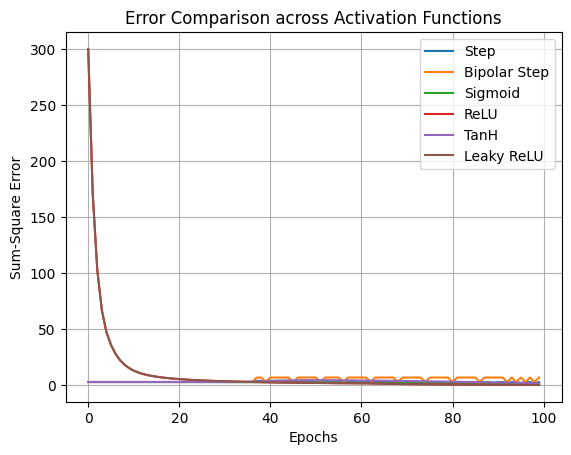

In [4]:
# Main program
if __name__ == "__main__":
    # AND gate data
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([0, 0, 0, 1])  # AND gate outputs

    # Parameters
    initial_weights = np.array([10, 0.2, -0.75])  # Including bias weight
    learning_rate = 0.05
    epochs = 100

    # Activation functions to compare
    activation_functions = {
        'Step': step_activation,
        'Bipolar Step': bipolar_step_activation,
        'Sigmoid': sigmoid_activation,
        'ReLU': relu_activation,
        'TanH': tanh_activation,
        'Leaky ReLU': leaky_relu_activation
    }

    # Run experiment and plot results
    results = run_experiment(X, y, initial_weights, learning_rate, epochs, activation_functions)

    # Print final weights and iterations to converge
    for name, (final_weights, _, iterations) in results.items():
        print(f"Activation Function: {name}")
        print(f"Final Weights: {final_weights}")
        print(f"Iterations to Converge: {iterations}\n")

    # Plot error comparison
    plot_error_comparison(results)


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# a) Summation Unit
def summation_unit(weights, inputs):
    """
    Summation unit that computes the weighted sum of inputs.

    Parameters:
    weights (np.array): Weights array.
    inputs (np.array): Inputs array (including bias).

    Returns:
    float: Weighted sum.
    """
    return np.dot(weights, inputs)

# b) Activation Unit – Step, Bipolar Step, Sigmoid, TanH, ReLU, Leaky ReLU
def step_activation(x):
    """ Step activation function. """
    return 1 if x >= 0 else 0

def bipolar_step_activation(x):
    """ Bipolar step activation function. """
    return 1 if x >= 0 else -1

def sigmoid_activation(x):
    """ Sigmoid activation function. """
    return 1 / (1 + np.exp(-x))

def tanh_activation(x):
    """ Hyperbolic tangent (TanH) activation function. """
    return np.tanh(x)

def relu_activation(x):
    """ ReLU activation function. """
    return max(0, x)

def leaky_relu_activation(x, alpha=0.01):
    """ Leaky ReLU activation function. """
    return x if x >= 0 else alpha * x

# c) Comparator Unit for Error Calculation
def error_calculation(target, output):
    """
    Error calculation using sum of squared errors.

    Parameters:
    target (int): Target output.
    output (float): Predicted output.

    Returns:
    float: Error value.
    """
    return 0.5 * (target - output)**2

# Perceptron Learning with different learning rates
def perceptron_learning(X, y, weights, learning_rate, epochs, activation_function):
    """
    Perceptron learning algorithm for different learning rates.

    Parameters:
    X (np.array): Input features.
    y (np.array): Target outputs.
    weights (np.array): Initial weights.
    learning_rate (float): Learning rate.
    epochs (int): Number of epochs.
    activation_function (function): Activation function.

    Returns:
    tuple: Final weights and list of error values over epochs.
    """
    error_list = []
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(X)):
            inputs = np.append(1, X[i])  # Adding bias input
            weighted_sum = summation_unit(weights, inputs)
            output = activation_function(weighted_sum)
            error = y[i] - output
            total_error += error**2
            # Update weights based on error
            weights += learning_rate * error * inputs
        error_list.append(total_error)
        if total_error == 0:
            break  # Stop if there's no error
    return weights, error_list

#   function to run experiment with varying learning rates
def run_experiment_vary_learning_rate(X, y, initial_weights, learning_rates, epochs, activation_function):
    results = {}
    for lr in learning_rates:
        weights = np.copy(initial_weights)
        final_weights, error_list = perceptron_learning(X, y, weights, lr, epochs, activation_function)
        results[lr] = len(error_list)  # Store the number of iterations to converge
    return results

def plot_learning_rate_vs_iterations(results):
    """ Plotting number of iterations vs learning rates. """
    learning_rates = list(results.keys())
    iterations = list(results.values())

    plt.plot(learning_rates, iterations, marker='o')
    plt.xlabel('Learning Rate')
    plt.ylabel('Iterations to Converge')
    plt.title('Iterations to Converge vs Learning Rate')
    plt.grid(True)
    plt.show()



Learning Rate: 0.1, Iterations to Converge: 68
Learning Rate: 0.2, Iterations to Converge: 37
Learning Rate: 0.3, Iterations to Converge: 23
Learning Rate: 0.4, Iterations to Converge: 23
Learning Rate: 0.5, Iterations to Converge: 19
Learning Rate: 0.6, Iterations to Converge: 19
Learning Rate: 0.7, Iterations to Converge: 15
Learning Rate: 0.8, Iterations to Converge: 14
Learning Rate: 0.9, Iterations to Converge: 13
Learning Rate: 1, Iterations to Converge: 12


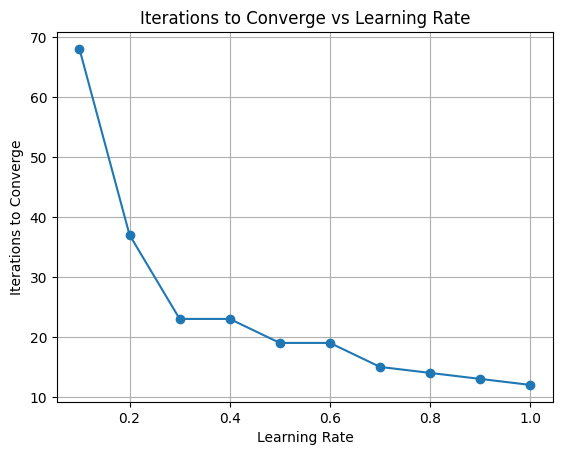

In [6]:
# Main program
if __name__ == "__main__":
    # AND gate data
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([0, 0, 0, 1])  # AND gate outputs

    # Parameters
    initial_weights = np.array([10, 0.2, -0.75])  # Including bias weight
    learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    epochs = 100

    # Use Step activation function for learning
    activation_function = step_activation

    # Run experiment with varying learning rates and plot results
    results = run_experiment_vary_learning_rate(X, y, initial_weights, learning_rates, epochs, activation_function)

    # Print learning rates and iterations to converge
    for lr, iterations in results.items():
        print(f"Learning Rate: {lr}, Iterations to Converge: {iterations}")

    # Plot the learning rate vs iterations to converge
    plot_learning_rate_vs_iterations(results)


#A5

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# a) Summation Unit
def summation_unit(weights, inputs):
    """
    Summation unit that computes the weighted sum of inputs.
    Parameters:
    weights (np.array): Weights array.
    inputs (np.array): Inputs array (including bias).
    Returns:
    float: Weighted sum.
    """
    return np.dot(weights, inputs)

# b) Activation Functions
def step_activation(x):
    """ Step activation function. """
    return 1 if x >= 0 else 0

def sigmoid_activation(x):
    """ Sigmoid activation function. """
    return 1 / (1 + np.exp(-x))

def relu_activation(x):
    """ ReLU activation function. """
    return max(0, x)

def tanh_activation(x):
    """ TanH activation function. """
    return np.tanh(x)

# c) Comparator Unit for Error Calculation
def error_calculation(target, output):
    """
    Error calculation using sum of squared errors.
    Parameters:
    target (int): Target output.
    output (float): Predicted output.
    Returns:
    float: Error value.
    """
    return 0.5 * (target - output)**2

# Multi-Layer Perceptron for XOR Gate
class XORPerceptron:
    def __init__(self, learning_rate=0.05, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        # Initial weights for the hidden layer and output layer
        self.weights_hidden = np.random.rand(2, 3)  # 2 neurons in hidden layer (2x3 including bias)
        self.weights_output = np.random.rand(1, 3)  # 1 neuron in output layer (1x3 including bias)

    def forward(self, inputs):
        """
        Forward pass: Calculate output for a given input through the network.
        """
        # Hidden layer calculations (including bias)
        self.hidden_input = np.append(1, inputs)  # Add bias
        self.hidden_sum = np.dot(self.weights_hidden, self.hidden_input)
        self.hidden_output = sigmoid_activation(self.hidden_sum)

        # Output layer calculations (including bias)
        self.hidden_output_with_bias = np.append(1, self.hidden_output)  # Add bias for the output layer
        self.output_sum = np.dot(self.weights_output, self.hidden_output_with_bias)
        self.output = sigmoid_activation(self.output_sum)

        return self.output

    def backward(self, inputs, target):
        """
        Backward pass: Update weights using gradient descent.
        """
        # Calculate output error (for output neuron)
        output_error = target - self.output
        output_delta = output_error * self.output * (1 - self.output)  # Sigmoid derivative

        # Update weights for output layer
        self.weights_output += self.learning_rate * output_delta * self.hidden_output_with_bias

        # Calculate hidden layer error and update weights
        hidden_errors = output_delta * self.weights_output[:, 1:] * self.hidden_output * (1 - self.hidden_output)
        self.weights_hidden += self.learning_rate * hidden_errors.T @ self.hidden_input[np.newaxis, :]

    def train(self, X, y):
        """
        Train the perceptron using backpropagation.
        """
        error_list = []
        for epoch in range(self.epochs):
            total_error = 0
            for i in range(len(X)):
                inputs = X[i]
                target = y[i]
                # Forward pass
                output = self.forward(inputs)
                # Backward pass and weight update
                self.backward(inputs, target)
                # Calculate error
                total_error += error_calculation(target, output)
            error_list.append(total_error)
            if total_error == 0:
                break  # Stop early if no error
        return error_list

# Experiment with XOR gate
def run_xor_experiment():
    # XOR gate data
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([0, 1, 1, 0])  # XOR gate outputs

    # Parameters
    learning_rate = 0.1
    epochs = 1000

    # Instantiate and train the XOR perceptron
    xor_perceptron = XORPerceptron(learning_rate=learning_rate, epochs=epochs)
    error_list = xor_perceptron.train(X, y)

    # Plot error vs epochs
    plt.plot(error_list)
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title('Error vs Epochs for XOR Perceptron')
    plt.grid(True)
    plt.show()

    # Print final outputs after training
    for i, inputs in enumerate(X):
        output = xor_perceptron.forward(inputs).item()  # Use .item() to get scalar value
        print(f"Input: {inputs}, Predicted Output: {round(output)}, Actual Output: {y[i]}")




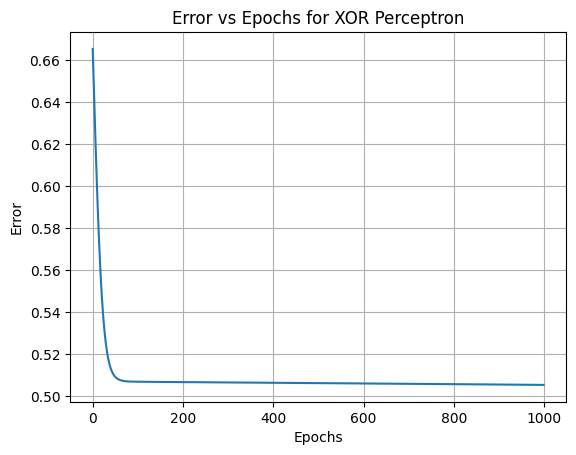

Input: [0 0], Predicted Output: 0, Actual Output: 0
Input: [0 1], Predicted Output: 1, Actual Output: 1
Input: [1 0], Predicted Output: 1, Actual Output: 1
Input: [1 1], Predicted Output: 1, Actual Output: 0


In [12]:
# Main program
if __name__ == "__main__":
    run_xor_experiment()

#A6

In [16]:
import pandas as pd
from google.colab import files

def upload_excel_to_colab(sheet_name):
    # Upload the Excel file
    uploaded = files.upload()


    file_name = list(uploaded.keys())[0]

    # Reading the specific sheet from the Excel file
    df_purchase = pd.read_excel(file_name, sheet_name=sheet_name)

    return df_purchase


sheet_name = 'Purchase data'
df_purchase= upload_excel_to_colab(sheet_name)


df_purchase.head()


Saving Lab Session Data.xlsx to Lab Session Data.xlsx


,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Candy,Mango,Milk
0,C_1,20,6,2,386,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,55.0,18.0
1,C_2,16,3,6,289,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C_3,27,6,2,393,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C_4,19,1,2,110,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C_5,24,4,2,280,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# List of columns to be removed
columns_to_remove = ['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
                     'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
                     'Unnamed: 17', 'Unnamed: 18', 'Candy', 'Mango', 'Milk']

# Drop the specified columns from the DataFrame
df_purchase = df_purchase.drop(columns=columns_to_remove)

# Display the updated DataFrame
print(df_purchase.head())


  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)  \
0      C_1           20             6                 2           386   
1      C_2           16             3                 6           289   
2      C_3           27             6                 2           393   
3      C_4           19             1                 2           110   
4      C_5           24             4                 2           280   

   Unnamed: 10  Unnamed: 11  
0          NaN          NaN  
1          NaN          NaN  
2          NaN          NaN  
3          NaN          NaN  
4          NaN          NaN  


In [20]:

df_purchase

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs)
0,C_1,20,6,2,386
1,C_2,16,3,6,289
2,C_3,27,6,2,393
3,C_4,19,1,2,110
4,C_5,24,4,2,280
5,C_6,22,1,5,167
6,C_7,15,4,2,271
7,C_8,18,4,2,274
8,C_9,21,1,4,148
9,C_10,16,2,4,198


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Derivative of the sigmoid function (for backpropagation)
def sigmoid_derivative(output):
    return output * (1 - output)

# Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs

    # Forward pass (Summation + Activation)
    def forward(self, inputs):
        z = np.dot(inputs, self.weights) + self.bias
        return sigmoid(z)

    # Training the perceptron
    def train(self, X, y):
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        error_list = []

        # Training loop
        for epoch in range(self.epochs):
            total_error = 0
            for i in range(X.shape[0]):
                # Forward pass
                output = self.forward(X[i])

                # Calculate error (target - predicted)
                error = y[i] - output

                # Update weights and bias (backpropagation)
                self.weights += self.learning_rate * error * sigmoid_derivative(output) * X[i]
                self.bias += self.learning_rate * error * sigmoid_derivative(output)

                # Accumulate error for plotting
                total_error += error ** 2

            error_list.append(total_error / X.shape[0])  # Mean Squared Error for each epoch

        return error_list

    # Prediction function
    def predict(self, X):
        output = self.forward(X)
        return 1 if output >= 0.5 else 0



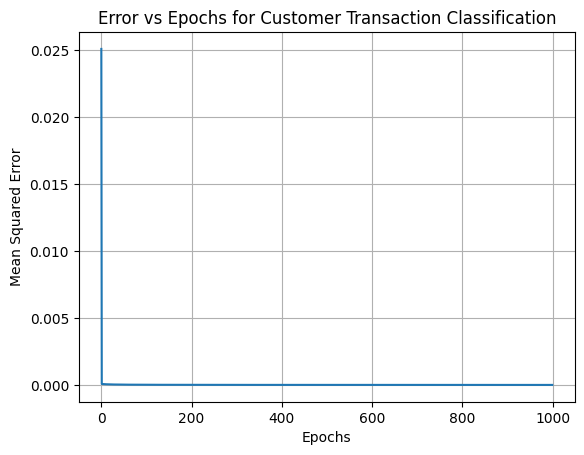

Final Predictions:
Input: [20  6  2], Predicted Class: 1, Actual Class: 1
Input: [16  3  6], Predicted Class: 1, Actual Class: 1
Input: [27  6  2], Predicted Class: 1, Actual Class: 1
Input: [19  1  2], Predicted Class: 1, Actual Class: 1
Input: [24  4  2], Predicted Class: 1, Actual Class: 1
Input: [22  1  5], Predicted Class: 1, Actual Class: 1
Input: [15  4  2], Predicted Class: 1, Actual Class: 1
Input: [18  4  2], Predicted Class: 1, Actual Class: 1
Input: [21  1  4], Predicted Class: 1, Actual Class: 1
Input: [16  2  4], Predicted Class: 1, Actual Class: 1


In [22]:
# Main program to train perceptron with customer data
def run_customer_classification():


    # Binary classification: 'High' if Payment >= 50, otherwise 'Low'
    df_purchase['High_Low'] = np.where(df_purchase['Payment (Rs)'] >= 50, 1, 0)

    # Features (X) and target (y)
    X = df_purchase[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
    y = df_purchase['High_Low'].values

    # Parameters
    learning_rate = 0.1
    epochs = 1000

    # Instantiate the perceptron and train
    perceptron = Perceptron(learning_rate=learning_rate, epochs=epochs)
    error_list = perceptron.train(X, y)

    # Plot error vs epochs
    plt.plot(error_list)
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.title('Error vs Epochs for Customer Transaction Classification')
    plt.grid(True)
    plt.show()

    # Print predictions
    print("Final Predictions:")
    for i, inputs in enumerate(X):
        prediction = perceptron.predict(inputs)
        print(f"Input: {inputs}, Predicted Class: {prediction}, Actual Class: {y[i]}")

# Run the customer transaction classification experiment
if __name__ == "__main__":
    run_customer_classification()


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs

    # Forward pass (Summation + Activation)
    def forward(self, inputs):
        z = np.dot(inputs, self.weights) + self.bias
        return sigmoid(z)

    # Training the perceptron
    def train(self, X, y):
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        error_list = []

        # Training loop
        for epoch in range(self.epochs):
            total_error = 0
            for i in range(X.shape[0]):
                # Forward pass
                output = self.forward(X[i])

                # Calculate error (target - predicted)
                error = y[i] - output

                # Update weights and bias (backpropagation)
                self.weights += self.learning_rate * error * sigmoid(output) * X[i]
                self.bias += self.learning_rate * error * sigmoid(output)

                # Accumulate error for plotting
                total_error += error ** 2

            error_list.append(total_error / X.shape[0])  # Mean Squared Error for each epoch

        return error_list

    # Prediction function
    def predict(self, X):
        output = self.forward(X)
        return 1 if output >= 0.5 else 0

# Function to compute weights using matrix pseudo-inverse
def pseudo_inverse(X, y):
    X = np.hstack((np.ones((X.shape[0], 1)), X))  # Adding bias term (column of ones)
    X_pseudo_inv = np.linalg.pinv(X)
    weights = np.dot(X_pseudo_inv, y)
    return weights




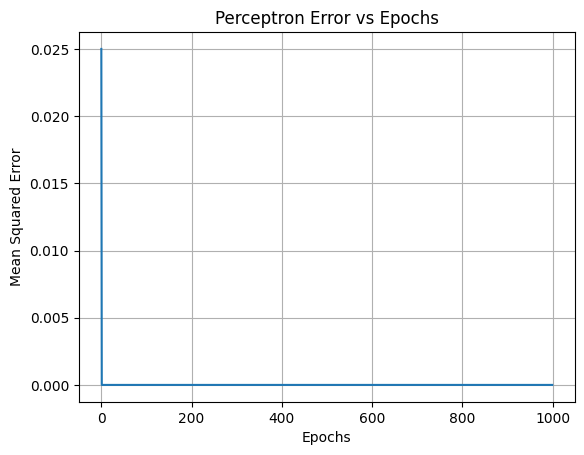

Perceptron Predictions:
Input: [20  6  2], Predicted Class: 1, Actual Class: 1
Input: [16  3  6], Predicted Class: 1, Actual Class: 1
Input: [27  6  2], Predicted Class: 1, Actual Class: 1
Input: [19  1  2], Predicted Class: 1, Actual Class: 1
Input: [24  4  2], Predicted Class: 1, Actual Class: 1
Input: [22  1  5], Predicted Class: 1, Actual Class: 1
Input: [15  4  2], Predicted Class: 1, Actual Class: 1
Input: [18  4  2], Predicted Class: 1, Actual Class: 1
Input: [21  1  4], Predicted Class: 1, Actual Class: 1
Input: [16  2  4], Predicted Class: 1, Actual Class: 1

Pseudo-Inverse Weights: [ 1.00000000e+00 -1.73472348e-17  2.77555756e-17  4.16333634e-17]

Pseudo-Inverse Predictions:
Input: [20  6  2], Predicted Class: 1, Actual Class: 1
Input: [16  3  6], Predicted Class: 1, Actual Class: 1
Input: [27  6  2], Predicted Class: 1, Actual Class: 1
Input: [19  1  2], Predicted Class: 1, Actual Class: 1
Input: [24  4  2], Predicted Class: 1, Actual Class: 1
Input: [22  1  5], Predicted Cl

In [24]:
# Main program to compare perceptron learning and pseudo-inverse
def run_comparison():

    # Binary classification: 'High' if Payment >= 50, otherwise 'Low'
    df_purchase['High_Low'] = np.where(df_purchase['Payment (Rs)'] >= 50, 1, 0)

    # Features (X) and target (y)
    X = df_purchase[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
    y = df_purchase['High_Low'].values

    # Parameters for perceptron
    learning_rate = 0.1
    epochs = 1000

    # Instantiate the perceptron and train
    perceptron = Perceptron(learning_rate=learning_rate, epochs=epochs)
    perceptron_error_list = perceptron.train(X, y)

    # Plot perceptron error vs epochs
    plt.plot(perceptron_error_list)
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.title('Perceptron Error vs Epochs')
    plt.grid(True)
    plt.show()

    # Print perceptron predictions
    print("Perceptron Predictions:")
    for i, inputs in enumerate(X):
        prediction = perceptron.predict(inputs)
        print(f"Input: {inputs}, Predicted Class: {prediction}, Actual Class: {y[i]}")

    # Compute weights using matrix pseudo-inverse
    pseudo_weights = pseudo_inverse(X, y)
    print(f"\nPseudo-Inverse Weights: {pseudo_weights}")

    # Prediction using pseudo-inverse weights
    X_with_bias = np.hstack((np.ones((X.shape[0], 1)), X))  # Adding bias term
    pseudo_predictions = np.dot(X_with_bias, pseudo_weights)

    print("\nPseudo-Inverse Predictions:")
    for i, pred in enumerate(pseudo_predictions):
        predicted_class = 1 if pred >= 0.5 else 0
        print(f"Input: {X[i]}, Predicted Class: {predicted_class}, Actual Class: {y[i]}")

# Run the comparison
if __name__ == "__main__":
    run_comparison()

#A8

In [25]:
import numpy as np

# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Derivative of Sigmoid function
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Neural Network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.05):
        self.learning_rate = learning_rate

        # Initialize weights and biases
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.bias_hidden = np.random.rand(hidden_size)
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        self.bias_output = np.random.rand(output_size)

    # Forward pass
    def forward(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = sigmoid(self.output_input)
        return self.output

    # Backward pass and weight update
    def backward(self, X, y):
        # Compute the error
        output_error = y - self.output

        # Calculate gradients
        output_delta = output_error * sigmoid_derivative(self.output_input)
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_input)

        # Update weights and biases
        self.weights_hidden_output += self.learning_rate * np.dot(self.hidden_output.T, output_delta)
        self.bias_output += self.learning_rate * np.sum(output_delta, axis=0)
        self.weights_input_hidden += self.learning_rate * np.dot(X.T, hidden_delta)
        self.bias_hidden += self.learning_rate * np.sum(hidden_delta, axis=0)

    # Training function
    def train(self, X, y, epochs):
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y)

            # Compute the mean squared error
            error = np.mean(np.square(y - self.output))
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Error: {error}')

    # Prediction function
    def predict(self, X):
        output = self.forward(X)
        return np.round(output)



In [26]:

# Main function to run the neural network
def run_nn_experiment():
    # AND gate input and output
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [0], [0], [1]])

    # Initialize and train the neural network
    nn = NeuralNetwork(input_size=2, hidden_size=2, output_size=1, learning_rate=0.05)
    nn.train(X, y, epochs=1000)

    # Test the neural network
    predictions = nn.predict(X)
    print("\nTest Results:")
    for i, inputs in enumerate(X):
        print(f"Input: {inputs}, Predicted Output: {predictions[i]}, Actual Output: {y[i]}")

# Run the experiment
if __name__ == "__main__":
    run_nn_experiment()

Epoch 0, Error: 0.3108253702202639
Epoch 100, Error: 0.19126266802121894
Epoch 200, Error: 0.18781988645471007
Epoch 300, Error: 0.18635365571946563
Epoch 400, Error: 0.1849176074118255
Epoch 500, Error: 0.18337012862855612
Epoch 600, Error: 0.1816531775728098
Epoch 700, Error: 0.1797101012213912
Epoch 800, Error: 0.17747936906140577
Epoch 900, Error: 0.17489290032504634

Test Results:
Input: [0 0], Predicted Output: [0.], Actual Output: [0]
Input: [0 1], Predicted Output: [0.], Actual Output: [0]
Input: [1 0], Predicted Output: [0.], Actual Output: [0]
Input: [1 1], Predicted Output: [0.], Actual Output: [1]


#A9

In [27]:
import numpy as np

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    """Apply the sigmoid activation function."""
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """Compute the derivative of the sigmoid function."""
    return sigmoid(x) * (1 - sigmoid(x))

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.05):
        """
        Initialize the Neural Network with specified parameters.

        Parameters:
        - input_size: Number of input neurons
        - hidden_size: Number of neurons in the hidden layer
        - output_size: Number of output neurons
        - learning_rate: Learning rate for weight updates
        """
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights and biases
        self.weights_input_hidden = np.random.uniform(-1, 1, (self.input_size, self.hidden_size))
        self.weights_hidden_output = np.random.uniform(-1, 1, (self.hidden_size, self.output_size))
        self.bias_hidden = np.random.uniform(-1, 1, (1, self.hidden_size))
        self.bias_output = np.random.uniform(-1, 1, (1, self.output_size))

    def forward(self, X):
        """
        Perform a forward pass through the network.

        Parameters:
        - X: Input data

        Returns:
        - The output of the network
        """
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)

        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = sigmoid(self.output_input)
        return self.output

    def backward(self, X, y):
        """
        Perform a backward pass to update weights and biases.

        Parameters:
        - X: Input data
        - y: Target output
        """
        output_error = self.output - y
        output_delta = output_error * sigmoid_derivative(self.output_input)

        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_input)

        # Update weights and biases
        self.update_weights_biases(X, hidden_delta, output_delta)

    def update_weights_biases(self, X, hidden_delta, output_delta):
        """
        Update weights and biases using computed deltas.

        Parameters:
        - X: Input data
        - hidden_delta: Error term for the hidden layer
        - output_delta: Error term for the output layer
        """
        self.weights_hidden_output -= self.learning_rate * np.dot(self.hidden_output.T, output_delta)
        self.bias_output -= self.learning_rate * np.sum(output_delta, axis=0, keepdims=True)

        self.weights_input_hidden -= self.learning_rate * np.dot(X.T, hidden_delta)
        self.bias_hidden -= self.learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)

    def train(self, X, y, epochs=10000):
        """
        Train the neural network.

        Parameters:
        - X: Input data
        - y: Target output
        - epochs: Number of epochs for training
        """
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y)
            if epoch % 1000 == 0:
                loss = np.mean(np.square(self.output - y))
                print(f'Epoch {epoch}, Loss: {loss}')

    def test(self, X, y):
        """
        Test the neural network after training.

        Parameters:
        - X: Input data
        - y: Target output
        """
        print("\nTesting the trained neural network:")
        for inputs in X:
            output = self.forward(inputs[np.newaxis])
            print(f"Input: {inputs}, Predicted Output: {round(output[0, 0])}, Actual Output: {y[np.where(np.all(X == inputs, axis=1))[0][0]]}")




In [28]:
def main():
    # XOR Gate data
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])

    y = np.array([[0],
                  [1],
                  [1],
                  [0]])

    # Initialize and train the neural network
    nn = NeuralNetwork(input_size=2, hidden_size=2, output_size=1, learning_rate=0.05)
    nn.train(X, y, epochs=10000)

    # Test the trained neural network
    nn.test(X, y)

if __name__ == "__main__":
    main()

Epoch 0, Loss: 0.29832691538218165
Epoch 1000, Loss: 0.2501941365604307
Epoch 2000, Loss: 0.2500849710083436
Epoch 3000, Loss: 0.25001702346017596
Epoch 4000, Loss: 0.2499625748053404
Epoch 5000, Loss: 0.24990532746951874
Epoch 6000, Loss: 0.24982818467352386
Epoch 7000, Loss: 0.24970144091227223
Epoch 8000, Loss: 0.24945555250716883
Epoch 9000, Loss: 0.24889017087992782

Testing the trained neural network:
Input: [0 0], Predicted Output: 1, Actual Output: [0]
Input: [0 1], Predicted Output: 1, Actual Output: [1]
Input: [1 0], Predicted Output: 0, Actual Output: [1]
Input: [1 1], Predicted Output: 0, Actual Output: [0]


#A10

In [29]:
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size, learning_rate=0.05, epochs=1000, convergence_threshold=0.002):
        """
        Initialize the Perceptron with given parameters.

        Parameters:
        - input_size: Number of input features
        - learning_rate: Learning rate for weight updates
        - epochs: Maximum number of epochs for training
        - convergence_threshold: Error threshold for convergence
        """
        self.weights = np.array([10, 0.2, -0.75])
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.convergence_threshold = convergence_threshold

    def step_function(self, x):
        """Step activation function."""
        return np.where(x >= 0, 1, 0)

    def forward(self, inputs):
        """
        Perform a forward pass and return the output.

        Parameters:
        - inputs: Array of input values

        Returns:
        - The output of the perceptron (array)
        """
        weighted_sum = summation_unit(inputs, self.weights[1:]) + self.weights[0]
        return self.step_function(weighted_sum)

    def train(self, X, y):
        """
        Train the perceptron using the provided data.

        Parameters:
        - X: Input data
        - y: Target output
        """
        errors = []
        for epoch in range(self.epochs):
            total_error = 0
            for inputs, target in zip(X, y):
                prediction = self.forward(inputs)
                error = target - prediction
                total_error += error ** 2
                self.weights[1:] += self.learning_rate * error * inputs
                self.weights[0] += self.learning_rate * error
            mse = total_error / len(X)
            errors.append(mse)
            if mse <= self.convergence_threshold:
                print(f'Converged at epoch {epoch}')
                break
        else:
            print('Reached maximum epochs without convergence')

        return errors

def plot_errors(errors):
    """
    Plot the errors over epochs.

    Parameters:
    - errors: List of mean squared errors recorded during training
    """
    plt.plot(errors)
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.title('Epochs vs Error')
    plt.show()




Converged at epoch 129


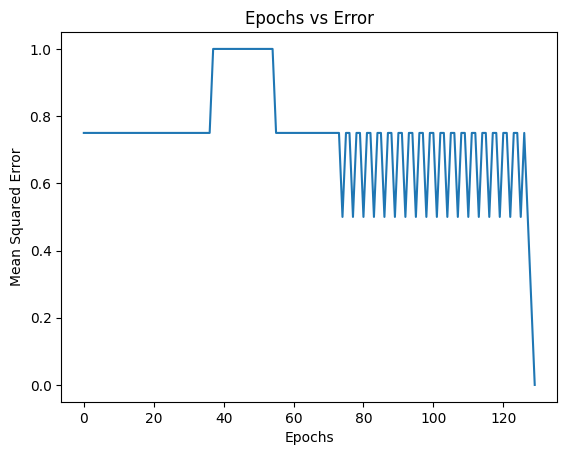

In [30]:
def main():
    # Define AND gate data
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    y = np.array([0, 0, 0, 1])  # AND gate output

    # Initialize and train the perceptron
    perceptron = Perceptron(input_size=2)
    errors = perceptron.train(X, y)

    # Plot the errors
    plot_errors(errors)

if __name__ == "__main__":
    main()

In [31]:
class PerceptronTwoOutput:
    def __init__(self, input_size, learning_rate=0.05, epochs=1000, convergence_threshold=0.002):
        """
        Initialize the Perceptron with two output nodes.

        Parameters:
        - input_size: Number of input features
        - learning_rate: Learning rate for weight updates
        - epochs: Maximum number of epochs for training
        - convergence_threshold: Error threshold for convergence
        """
        self.weights = np.random.uniform(-1, 1, (input_size + 1, 2))  # Include bias term
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.convergence_threshold = convergence_threshold

    def sigmoid(self, x):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        """Derivative of the sigmoid function."""
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def forward(self, inputs):
        """
        Perform a forward pass and return the output.

        Parameters:
        - inputs: Array of input values

        Returns:
        - The output of the perceptron (array)
        """
        inputs_with_bias = np.append(inputs, 1)  # Adding bias term
        weighted_sum = np.dot(inputs_with_bias, self.weights)
        return self.sigmoid(weighted_sum)

    def train(self, X, y):
        """
        Train the perceptron using the provided data.

        Parameters:
        - X: Input data
        - y: Target output
        """
        errors = []
        for epoch in range(self.epochs):
            total_error = 0
            for inputs, target in zip(X, y):
                inputs_with_bias = np.append(inputs, 1)  # Adding bias term
                prediction = self.forward(inputs)
                error = target - prediction
                total_error += np.sum(error ** 2)

                # Backward pass
                delta = error * self.sigmoid_derivative(prediction)
                self.weights += self.learning_rate * np.outer(inputs_with_bias, delta)

            mse = total_error / len(X)
            errors.append(mse)
            if mse <= self.convergence_threshold:
                print(f'Converged at epoch {epoch}')
                break
        else:
            print('Reached maximum epochs without convergence')

        return errors



Reached maximum epochs without convergence


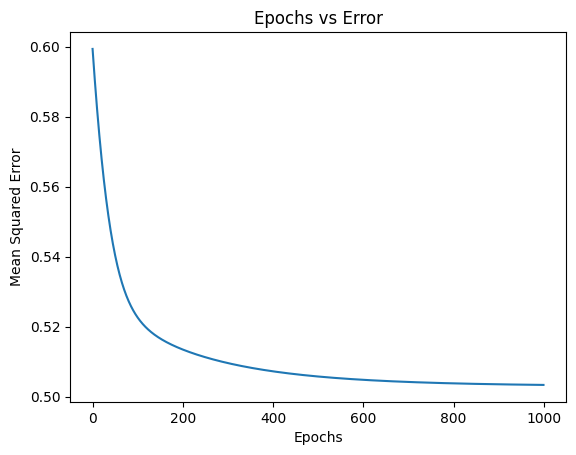

In [32]:
def main():
    # Define XOR gate data with two output nodes
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    y = np.array([[1, 0],  # Expected output [1, 0] for 0
                  [0, 1],  # Expected output [0, 1] for 1
                  [0, 1],  # Expected output [0, 1] for 1
                  [1, 0]]) # Expected output [1, 0] for 0

    # Initialize and train the perceptron
    perceptron = PerceptronTwoOutput(input_size=2)
    errors = perceptron.train(X, y)

    # Plot the errors
    plot_errors(errors)

if __name__ == "__main__":
    main()


#A11

In [33]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

def main_and_gate():
    # Define AND gate data
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    y = np.array([0, 0, 0, 1])  # AND gate output

    # Initialize and train the MLPClassifier
    mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', solver='adam', learning_rate_init=0.05, max_iter=1000)
    mlp.fit(X, y)

    # Make predictions
    predictions = mlp.predict(X)
    accuracy = accuracy_score(y, predictions)

    # Print results
    print(f'Predictions: {predictions}')
    print(f'Actual Output: {y}')
    print(f'Accuracy: {accuracy:.2f}')




In [34]:
if __name__ == "__main__":
    main_and_gate()

Predictions: [0 0 0 1]
Actual Output: [0 0 0 1]
Accuracy: 1.00


In [35]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

def main_xor_gate():
    # Define XOR gate data
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    y = np.array([0, 1, 1, 0])  # XOR gate output

    # Initialize and train the MLPClassifier
    mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', solver='adam', learning_rate_init=0.05, max_iter=1000)
    mlp.fit(X, y)

    # Make predictions
    predictions = mlp.predict(X)
    accuracy = accuracy_score(y, predictions)

    # Print results
    print(f'Predictions: {predictions}')
    print(f'Actual Output: {y}')
    print(f'Accuracy: {accuracy:.2f}')


In [36]:

if __name__ == "__main__":
    main_xor_gate()


Predictions: [1 1 1 1]
Actual Output: [0 1 1 0]
Accuracy: 0.50


#A12

In [37]:
from google.colab import files
import pandas as pd

def upload_csv_to_colab():
    # Uploading file
    uploaded = files.upload()

    # Get the filename from the uploaded dictionary
    filename = next(iter(uploaded))

    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(filename)

    print(f"File {filename} uploaded successfully!")
    return df


In [38]:
# Call the function to upload the CSV file
df = upload_csv_to_colab()

# Display the first few rows of the DataFrame
df.head()


Saving CTG.csv to CTG.csv
File CTG.csv uploaded successfully!


,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [40]:
df=df.dropna()

In [41]:
df.dtypes

,0
FileName,object
Date,object
SegFile,object
b,float64
e,float64
LBE,float64
LB,float64
AC,float64
FM,float64
UC,float64


In [42]:
df=df.drop(["FileName","Date","SegFile","b","e"],axis=1)

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



def prepare_data(df, target_column):
    """
    Prepare features and target variable from the DataFrame.

    Args:
    df (pd.DataFrame): The DataFrame containing the data.
    target_column (str): The name of the target column.

    Returns:
    tuple: (X, y) where X is the feature matrix and y is the target vector.
    """
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    return X, y

def split_data(X, y, test_size=0.2, random_state=42):
    """
    Split the data into training and testing sets.

    Args:
    X (pd.DataFrame): Features matrix.
    y (pd.Series): Target vector.
    test_size (float): Proportion of the dataset to include in the test split.
    random_state (int): Random seed for reproducibility.

    Returns:
    tuple: (X_train, X_test, y_train, y_test)
    """
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def train_mlp(X_train, y_train, learning_rate=0.05, max_iter=1000):
    """
    Train the MLPClassifier model.

    Args:
    X_train (pd.DataFrame): Training feature matrix.
    y_train (pd.Series): Training target vector.
    learning_rate (float): Learning rate for the optimizer.
    max_iter (int): Maximum number of iterations.

    Returns:
    MLPClassifier: Trained MLP model.
    """
    mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam',
                        learning_rate_init=learning_rate, max_iter=max_iter, random_state=42)
    mlp.fit(X_train, y_train)
    return mlp

def evaluate_model(model, X_test, y_test):
    """
    Evaluate the MLP model using accuracy, confusion matrix, and classification report.

    Args:
    model (MLPClassifier): Trained MLP model.
    X_test (pd.DataFrame): Testing feature matrix.
    y_test (pd.Series): Testing target vector.

    Returns:
    dict: Contains accuracy, confusion matrix, and classification report.
    """
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    return {
        'accuracy': accuracy,
        'confusion_matrix': conf_matrix,
        'classification_report': class_report
    }




In [45]:
def main():
    # Load the dataset

    # Prepare the data
    X, y = prepare_data(df, 'CLASS')  #   target column name

    # Split the data
    X_train, X_test, y_train, y_test = split_data(X, y)

    # Train the model
    mlp_model = train_mlp(X_train, y_train)

    # Evaluate the model
    results = evaluate_model(mlp_model, X_test, y_test)

    # Print results
    print(f'Accuracy: {results["accuracy"]:.2f}')
    print('Confusion Matrix:')
    print(results['confusion_matrix'])
    print('Classification Report:')
    print(results['classification_report'])

if __name__ == "__main__":
    main()

Accuracy: 0.27
Confusion Matrix:
[[  0  73   0   0   0   0   0   0   0   0]
 [  0 114   0   0   0   0   0   0   0   0]
 [  0  13   0   0   0   0   0   0   0   0]
 [  0  19   0   0   0   0   0   0   0   0]
 [  0  17   0   0   0   0   0   0   0   0]
 [  0  63   0   0   0   0   0   0   0   0]
 [  0  54   0   0   0   0   0   0   0   0]
 [  0  16   0   0   0   0   0   0   0   0]
 [  0  12   0   0   0   0   0   0   0   0]
 [  0  45   0   0   0   0   0   0   0   0]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        73
         2.0       0.27      1.00      0.42       114
         3.0       0.00      0.00      0.00        13
         4.0       0.00      0.00      0.00        19
         5.0       0.00      0.00      0.00        17
         6.0       0.00      0.00      0.00        63
         7.0       0.00      0.00      0.00        54
         8.0       0.00      0.00      0.00        16
         9.0       0.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
